# https://www.kaggle.com/datasets/oyekanmiolamilekan/fake-employee-dataset

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import hashlib
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
pd.set_option('display.max_columns', None)

In [24]:
df = pd.read_csv("fake_employee.csv")
df.head()

,employee_id,name,gender,dates_of_birth,email,phone_number,address,department,job_titles,manager_id,hire_date,salary,employment_status,employee_type,education_level,certifications,skills,performance_ratings,work_experience,benefits_enrollment,city,work_hours,employee_status,emergency_contacts
0,6612,Martha Hutchinson,Male,1970-11-14,randy09@example.net,708-895-4293x86180,"5301 Norman Flats Apt. 965\nNorth Darrell, PW ...",Finance,Administrator,10,2023-04-06,77367,Part-time,Regular,Master's Degree,team,"senior, kitchen, president, call, station",3,Receive determine pass find. Authority laugh r...,"data, cell, people",Hollandberg,9-5,Active,Alicia Payne: 001-469-835-3679x07176
1,4793,Meghan Cervantes,Non-Binary,1992-08-20,matthewsnyder@example.com,001-727-813-2133x30484,"7917 Vincent Trafficway Apt. 254\nHallhaven, D...",Finance,Mental health nurse,8,2022-05-26,81869,Full-time,Temporary,PhD,"whether, some, measure","perhaps, knowledge, officer",4,Prevent meet bill computer upon keep receive. ...,"appear, discover",East Sabrinafurt,9-5,Active,Brandy Lopez: +1-642-314-0561x6900
2,8832,April Hanna,Male,1986-04-17,lwood@example.net,+1-758-402-2437x248,"646 Courtney Hollow\nSouth Marc, LA 67617",Finance,Field seismologist,6,2020-06-11,97907,Part-time,Temporary,PhD,"job, week","tend, official, red",4,Necessary Congress real.,"stop, woman",New Garyfurt,9-5,Active,Craig Rivera: 267.574.5240x08971
3,7044,George Yang,Non-Binary,2001-03-15,ellen93@example.net,001-682-318-3829x45513,"3930 Kelly Wells Apt. 574\nPaulton, OR 22142",Engineering,"Nurse, children's",5,2020-11-25,110034,Part-time,Regular,PhD,"position, similar","question, their, health, single, whole",2,Yard whose different trade. Free foreign quest...,"product, either",Christophermouth,12-8,On Leave,Lauren Davis: 423.534.7439
4,4498,Joseph Patrick,Male,1998-10-09,patriciacollins@example.net,001-790-812-0148x64174,"0493 Lane Avenue\nSmithburgh, IN 65374",Engineering,Meteorologist,2,2021-01-12,70091,Contractor,Contract,Bachelor's Degree,"table, seem","how, government, finally, east, strong",4,Agreement tax chair strategy bring kid assume ...,"gas, commercial",South Jamestown,Night Shift,Terminated,Antonio Ferguson: +1-425-489-9331


In [25]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   employee_id          1000 non-null   int64 
 1   name                 1000 non-null   object
 2   gender               1000 non-null   object
 3   dates_of_birth       1000 non-null   object
 4   email                1000 non-null   object
 5   phone_number         1000 non-null   object
 6   address              1000 non-null   object
 7   department           1000 non-null   object
 8   job_titles           1000 non-null   object
 9   manager_id           1000 non-null   int64 
 10  hire_date            1000 non-null   object
 11  salary               1000 non-null   int64 
 12  employment_status    1000 non-null   object
 13  employee_type        1000 non-null   object
 14  education_level      1000 non-null   object
 15  certifications       1000 non-null   object
 16  skills 

,employee_id,manager_id,salary,performance_ratings
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5527.310000,5.454000,81531.299000,2.991000
std,2546.946895,2.837241,23216.141548,1.406021
min,1022.000000,1.000000,40027.000000,1.000000
25%,3351.500000,3.000000,61903.750000,2.000000
50%,5559.000000,5.000000,82902.000000,3.000000
75%,7732.750000,8.000000,101614.750000,4.000000
max,9995.000000,10.000000,119987.000000,5.000000


# Functions

In [26]:

# def preprocess_for_ml(df_in):
#     df = df_in.copy()
#     y = df['salary']
#     X = df.drop(columns=['salary'])  # Drop the target column
    
#     # Replace '*' with a unique value (-1) in all columns
#     X = X.replace('*', -1)
    
#     # Encode only categorical columns
#     for col in X.select_dtypes(include='object').columns:
#         encoder = LabelEncoder()
#         # Apply LabelEncoder only on the categorical columns
#         X[col] = encoder.fit_transform(X[col].astype(str))  # Ensure everything is treated as string

#     return X, y


In [27]:
# Step 1: Replace '*' with -1 for handling it during preprocessing
def preprocess_for_ml(df):
    y = df['salary']
    X = df.drop(columns=['salary'])  # Drop the target column
    
    # Replace '*' with -1
    X = X.replace('*', -1)
    
    # Encode categorical variables
    for col in X.select_dtypes(include='object').columns:
        encoder = LabelEncoder()
        X[col] = encoder.fit_transform(X[col].astype(str))  # Ensure everything is treated as string

    return X, y

In [28]:

# Function to train and evaluate models
def train_and_evaluate(model, X_train, X_test, y_train, y_test, label=''):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Model ({label}) - MAE: {mae:.2f}")
    return mae


In [29]:

# Training and evaluation function for all models
def evaluate_models(X_train, X_test, y_train, y_test):
    models = [
        (RandomForestRegressor(random_state=42), "Random Forest"),
        (LinearRegression(), "Linear Regression"),
        (DecisionTreeRegressor(random_state=42), "Decision Tree"),
        (GradientBoostingRegressor(random_state=42), "Gradient Boosting")
    ]
    
    results = {}
    for model, label in models:
        mae = train_and_evaluate(model, X_train, X_test, y_train, y_test, label)
        results[label] = mae

    return results


# Pre-processing

In [30]:
# Use the original dataset (with PII)
df_original = df.copy()



In [31]:

# X, y = preprocess_for_ml(df_original)  # This step should be from your previous code

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Evaluate models
# model_results = evaluate_models(X_train, X_test, y_train, y_test)

# # Print the comparison of MAE results
# print("\nModel Comparison - MAE:")
# for model_name, mae in model_results.items():
#     print(f"{model_name}: {mae:.2f}")


In [32]:
df[["salary"]].head()

,salary
0,77367
1,81869
2,97907
3,110034
4,70091


In [33]:
# Round salary to the nearest 5,000
df['salary'] = (df['salary'] // 5000) * 5000


In [34]:
df[["salary"]].head()

,salary
0,75000
1,80000
2,95000
3,110000
4,70000


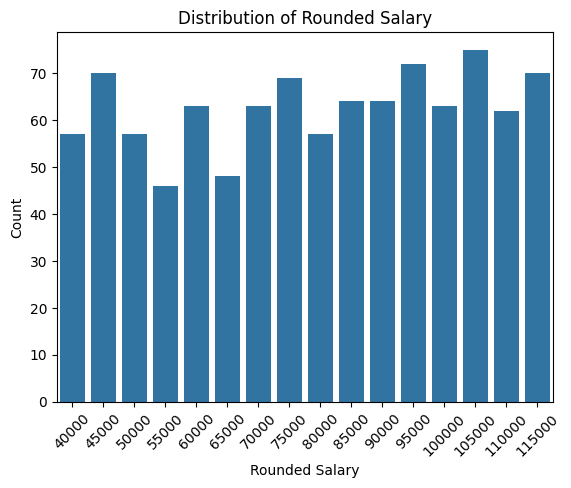

In [35]:
# Create a countplot for the rounded salary (assuming 'rounded_salary_5000' is the column)
sns.countplot(data=df, x='salary')
plt.title('Distribution of Rounded Salary')
plt.xlabel('Rounded Salary')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [36]:
X, y = preprocess_for_ml(df)  # This step should be from your previous code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate models
model_results = evaluate_models(X_train, X_test, y_train, y_test)


Model (Random Forest) - MAE: 19476.00
Model (Linear Regression) - MAE: 19045.90
Model (Decision Tree) - MAE: 27575.00
Model (Gradient Boosting) - MAE: 19507.98


# K-1 Anonymity

In [ ]:
def apply_k_anonymity(df, k):
    df = df.copy()
    
    # Define quasi-identifiers
    QIDs = ['gender', 'city', 'department', 'job_titles', 'hire_date']
    
    # Generalization based on k level
    def generalize(row):
        # Gender
        if k >= 10:
            row['gender'] = '*'  # full suppression
        elif k >= 5:
            row['gender'] = row['gender'][0] if isinstance(row['gender'], str) else row['gender']
        
        # City
        if k >= 10:
            row['city'] = '*'
        elif k >= 5:
            row['city'] = row['city'][:3] if isinstance(row['city'], str) else row['city']
        elif k >= 2:
            row['city'] = row['city'][:5] if isinstance(row['city'], str) else row['city']
        
        # Department (no hierarchy assumed, so we lightly mask)
        if k >= 10:
            row['department'] = '*'
        
        # Job titles
        if k >= 10:
            row['job_titles'] = '*'
        elif k >= 5:
            row['job_titles'] = " ".join(row['job_titles'].split()[:2]) if isinstance(row['job_titles'], str) else row['job_titles']
        elif k >= 2:
            row['job_titles'] = " ".join(row['job_titles'].split()[:3]) if isinstance(row['job_titles'], str) else row['job_titles']
        
        # Hire date
        if k >= 10:
            row['hire_date'] = '*'
        elif k >= 5:
            row['hire_date'] = pd.to_datetime(row['hire_date']).year
        elif k >= 2:
            row['hire_date'] = pd.to_datetime(row['hire_date']).strftime('%Y-%m')
        
        return row

    # Apply generalization
    df = df.apply(generalize, axis=1)
    
    # Group by QIDs and get group sizes
    group_sizes = df.groupby(QIDs).size().reset_index(name='counts')
    
    # Identify groups with fewer than k
    small_groups = group_sizes[group_sizes['counts'] < k]
    
    # Suppression for small groups
    def suppress(row):
        is_small = ((small_groups[QIDs] == row[QIDs]).all(axis=1)).any()
        if is_small:
            for col in QIDs:
                row[col] = '*'
        return row

    # Apply suppression
    df = df.apply(suppress, axis=1)
    
    print(f"✅ Anonymization for k={k}:")
    print(f" - Unique QID combinations: {df[QIDs].drop_duplicates().shape[0]}")
    print(f" - Suppressed rows: {(df[QIDs] == '*').all(axis=1).sum()}")
    
    return df

In [50]:
df[["salary"]]

,salary
0,75000
1,80000
2,95000
3,110000
4,70000
...,...
995,85000
996,105000
997,70000
998,45000


## K=2

In [ ]:


df_anonymous = apply_k_anonymity(df, k=2)

# X_processed, y_processed = preprocess_for_ml(df_anonymous)

# df_anonymous.head()


/tmp/ipykernel_18760/3167760416.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace('*', -1)


,employee_id,name,gender,dates_of_birth,email,phone_number,address,department,job_titles,manager_id,hire_date,salary,employment_status,employee_type,education_level,certifications,skills,performance_ratings,work_experience,benefits_enrollment,city,work_hours,employee_status,emergency_contacts
0,6612,Martha Hutchinson,*,1970-11-14,randy09@example.net,708-895-4293x86180,"5301 Norman Flats Apt. 965\nNorth Darrell, PW ...",*,*,10,*,75000,Part-time,Regular,Master's Degree,team,"senior, kitchen, president, call, station",3,Receive determine pass find. Authority laugh r...,"data, cell, people",*,9-5,Active,Alicia Payne: 001-469-835-3679x07176
1,4793,Meghan Cervantes,*,1992-08-20,matthewsnyder@example.com,001-727-813-2133x30484,"7917 Vincent Trafficway Apt. 254\nHallhaven, D...",*,*,8,*,80000,Full-time,Temporary,PhD,"whether, some, measure","perhaps, knowledge, officer",4,Prevent meet bill computer upon keep receive. ...,"appear, discover",*,9-5,Active,Brandy Lopez: +1-642-314-0561x6900
2,8832,April Hanna,*,1986-04-17,lwood@example.net,+1-758-402-2437x248,"646 Courtney Hollow\nSouth Marc, LA 67617",*,*,6,*,95000,Part-time,Temporary,PhD,"job, week","tend, official, red",4,Necessary Congress real.,"stop, woman",*,9-5,Active,Craig Rivera: 267.574.5240x08971
3,7044,George Yang,*,2001-03-15,ellen93@example.net,001-682-318-3829x45513,"3930 Kelly Wells Apt. 574\nPaulton, OR 22142",*,*,5,*,110000,Part-time,Regular,PhD,"position, similar","question, their, health, single, whole",2,Yard whose different trade. Free foreign quest...,"product, either",*,12-8,On Leave,Lauren Davis: 423.534.7439
4,4498,Joseph Patrick,*,1998-10-09,patriciacollins@example.net,001-790-812-0148x64174,"0493 Lane Avenue\nSmithburgh, IN 65374",*,*,2,*,70000,Contractor,Contract,Bachelor's Degree,"table, seem","how, government, finally, east, strong",4,Agreement tax chair strategy bring kid assume ...,"gas, commercial",*,Night Shift,Terminated,Antonio Ferguson: +1-425-489-9331


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)


model_results = evaluate_models(X_train, X_test, y_train, y_test)


Model (Random Forest) - MAE: 19356.00
Model (Linear Regression) - MAE: 18977.18
Model (Decision Tree) - MAE: 27200.00
Model (Gradient Boosting) - MAE: 19743.03


## K=5

In [ ]:

df_anonymous = apply_k_anonymity(df, k=5)

X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_processed.head()


/tmp/ipykernel_18760/3167760416.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace('*', -1)


,employee_id,name,gender,dates_of_birth,email,phone_number,address,department,job_titles,manager_id,hire_date,employment_status,employee_type,education_level,certifications,skills,performance_ratings,work_experience,benefits_enrollment,city,work_hours,employee_status,emergency_contacts
0,6612,629,-1,278,740,839,493,-1,-1,10,-1,2,1,3,813,755,3,681,202,-1,1,0,14
1,4793,651,-1,728,595,453,701,-1,-1,8,-1,1,2,4,910,646,4,642,55,-1,1,0,107
2,8832,85,-1,599,560,311,582,-1,-1,6,-1,2,2,4,413,860,4,545,780,-1,1,0,209
3,7044,337,-1,881,274,437,353,-1,-1,5,-1,2,1,4,594,694,2,991,601,-1,0,1,587
4,4498,482,-1,844,701,465,48,-1,-1,2,-1,0,0,1,806,416,4,26,322,-1,2,2,69


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)


model_results = evaluate_models(X_train, X_test, y_train, y_test)

Model (Random Forest) - MAE: 19356.00
Model (Linear Regression) - MAE: 18977.18
Model (Decision Tree) - MAE: 27200.00
Model (Gradient Boosting) - MAE: 19743.03


## K=10

In [43]:
df_anonymous = apply_k_anonymity(df, k=10)

X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_processed.head()


✅ Anonymization for k=10:
 - Unique QID combinations: 1
 - Suppressed rows: 1000


/tmp/ipykernel_18760/3167760416.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace('*', -1)


,employee_id,name,gender,dates_of_birth,email,phone_number,address,department,job_titles,manager_id,hire_date,employment_status,employee_type,education_level,certifications,skills,performance_ratings,work_experience,benefits_enrollment,city,work_hours,employee_status,emergency_contacts
0,6612,629,-1,278,740,839,493,-1,-1,10,-1,2,1,3,813,755,3,681,202,-1,1,0,14
1,4793,651,-1,728,595,453,701,-1,-1,8,-1,1,2,4,910,646,4,642,55,-1,1,0,107
2,8832,85,-1,599,560,311,582,-1,-1,6,-1,2,2,4,413,860,4,545,780,-1,1,0,209
3,7044,337,-1,881,274,437,353,-1,-1,5,-1,2,1,4,594,694,2,991,601,-1,0,1,587
4,4498,482,-1,844,701,465,48,-1,-1,2,-1,0,0,1,806,416,4,26,322,-1,2,2,69


In [44]:

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)


model_results = evaluate_models(X_train, X_test, y_train, y_test)

Model (Random Forest) - MAE: 19356.00
Model (Linear Regression) - MAE: 18977.18
Model (Decision Tree) - MAE: 27200.00
Model (Gradient Boosting) - MAE: 19743.03


## K=15

In [45]:
df_anonymous = apply_k_anonymity(df, k=15)

X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_processed.head()


✅ Anonymization for k=15:
 - Unique QID combinations: 1
 - Suppressed rows: 1000


/tmp/ipykernel_18760/3167760416.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace('*', -1)


,employee_id,name,gender,dates_of_birth,email,phone_number,address,department,job_titles,manager_id,hire_date,employment_status,employee_type,education_level,certifications,skills,performance_ratings,work_experience,benefits_enrollment,city,work_hours,employee_status,emergency_contacts
0,6612,629,-1,278,740,839,493,-1,-1,10,-1,2,1,3,813,755,3,681,202,-1,1,0,14
1,4793,651,-1,728,595,453,701,-1,-1,8,-1,1,2,4,910,646,4,642,55,-1,1,0,107
2,8832,85,-1,599,560,311,582,-1,-1,6,-1,2,2,4,413,860,4,545,780,-1,1,0,209
3,7044,337,-1,881,274,437,353,-1,-1,5,-1,2,1,4,594,694,2,991,601,-1,0,1,587
4,4498,482,-1,844,701,465,48,-1,-1,2,-1,0,0,1,806,416,4,26,322,-1,2,2,69


In [46]:

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)


model_results = evaluate_models(X_train, X_test, y_train, y_test)

Model (Random Forest) - MAE: 19356.00
Model (Linear Regression) - MAE: 18977.18
Model (Decision Tree) - MAE: 27200.00
Model (Gradient Boosting) - MAE: 19743.03


## K=20

In [47]:
df_anonymous = apply_k_anonymity(df, k=20)

X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_processed.head()


✅ Anonymization for k=20:
 - Unique QID combinations: 1
 - Suppressed rows: 1000


/tmp/ipykernel_18760/3167760416.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace('*', -1)


,employee_id,name,gender,dates_of_birth,email,phone_number,address,department,job_titles,manager_id,hire_date,employment_status,employee_type,education_level,certifications,skills,performance_ratings,work_experience,benefits_enrollment,city,work_hours,employee_status,emergency_contacts
0,6612,629,-1,278,740,839,493,-1,-1,10,-1,2,1,3,813,755,3,681,202,-1,1,0,14
1,4793,651,-1,728,595,453,701,-1,-1,8,-1,1,2,4,910,646,4,642,55,-1,1,0,107
2,8832,85,-1,599,560,311,582,-1,-1,6,-1,2,2,4,413,860,4,545,780,-1,1,0,209
3,7044,337,-1,881,274,437,353,-1,-1,5,-1,2,1,4,594,694,2,991,601,-1,0,1,587
4,4498,482,-1,844,701,465,48,-1,-1,2,-1,0,0,1,806,416,4,26,322,-1,2,2,69


In [48]:

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)


model_results = evaluate_models(X_train, X_test, y_train, y_test)

Model (Random Forest) - MAE: 19356.00
Model (Linear Regression) - MAE: 18977.18
Model (Decision Tree) - MAE: 27200.00
Model (Gradient Boosting) - MAE: 19743.03
